In [1]:
import librosa
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from librosa.feature import mfcc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import multivariate_normal
from scipy.special import logsumexp
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score



In [2]:
crema = '/Users/mykhailoponomarenko/Desktop/UCU year 2 sem 2/Linear algebra/SER/CREMA'
crema_dir = os.listdir(crema)
emotions = []
path_file = []
for audio in crema_dir :
    path_file.append(crema +'/'+ audio)
    parts = audio.split("_")
    if "ANG" in parts:
        emotions.append("Angry")
    elif "DIS" in parts:
        emotions.append("Disgust")
    elif "FEA" in parts:
        emotions.append("Fear")
    elif "HAP" in parts:
        emotions.append("Happy")
    elif "SAD" in parts:
        emotions.append("Sad")
    elif "NEU" in parts:
        emotions.append("Neutral")
# MAKE THIS INFORMATION INTO DATAFRAME
emotion_df = pd.DataFrame(emotions, columns=["Emotions"])
filePath_df = pd.DataFrame(path_file, columns=["Path"])

crema_df = pd.concat([emotion_df, filePath_df], axis=1)
crema_df.tail(10)

,Emotions,Path
7432,Neutral,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7433,Fear,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7434,Neutral,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7435,Happy,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7436,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7437,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7438,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7439,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7440,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
7441,Neutral,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...


In [3]:
tess='/Users/mykhailoponomarenko/Desktop/UCU year 2 sem 2/Linear algebra/SER/TESS'
tess_dir = os.listdir(tess)
emotions = []
filepath = []

for dir in tess_dir:
    try:
        folder = os.listdir(tess+'/'+dir)
        for audio in folder:
            #print(audio)
            audio_description = audio.split(".")[0]
            file = audio_description.split("_")
            if 'ps' in file:
                emotions.append('Surprised')
            elif len(file)==2:
                emotions.append(file[1])

            else:
                emotions.append(file[2])
            filepath.append(tess+'/'+dir+"/"+audio)
    except:
        print('Skip')


emotions_df = pd.DataFrame(emotions, columns=["Emotions"])
pathFile_df = pd.DataFrame(filepath, columns=["Path"])

tess_df = pd.concat([emotions_df, pathFile_df], axis=1)
tess_df['Emotions'] = tess_df['Emotions'].replace({"neutral":'Neutral', "happy":'Happy', "sad":'Sad', "angry":'Angry', "fear":'Fear', 'disgust':'Disgust', 'surprised':'Surprised'})
tess_df['Emotions'] = tess_df['Emotions'].replace('surprise', 'Surprised')


tess_df

Skip


,Emotions,Path
0,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
1,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
3,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
4,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
...,...,...
2795,Sad,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2796,Sad,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2797,Sad,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2798,Sad,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...


In [4]:
ravdess='/Users/mykhailoponomarenko/Desktop/UCU year 2 sem 2/Linear algebra/SER/RAVDESS'
ravdess_dir = os.listdir(ravdess)

ravdees_dir =ravdess_dir[0]
emotions = []
path_file = []

for directory in ravdess_dir:
    try:
        actor = os.listdir(ravdess+"/"+directory)
        for audio in actor:
            file_info = audio.split("-")
            emotions.append(int(file_info[2]))
            path_file.append(ravdess+'/'+directory+"/"+audio)
    except:
        print('Passed')
## DATAFRAME
emotions_df = pd.DataFrame(emotions, columns=["Emotions"])
pathFile_df = pd.DataFrame(path_file, columns=["Path"])

ravdess_df = pd.concat([emotions_df, pathFile_df], axis=1)
ravdess_df['Emotions'] = ravdess_df['Emotions'].replace({1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust', 8:'Surprise'})
ravdess_df.head()

Passed


,Emotions,Path
0,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
1,Fear,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2,Fear,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
3,Angry,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...
4,Disgust,/Users/mykhailoponomarenko/Desktop/UCU year 2 ...


In [5]:
df = pd.concat([crema_df,ravdess_df, tess_df],axis=0)
df['Emotions'] = df['Emotions'].replace('Surprise', 'Surprised')
df['Emotions'] = df['Emotions'].replace('Calm', 'Neutral')
len(df)
print(df["Emotions"].unique())


['Angry' 'Neutral' 'Disgust' 'Sad' 'Fear' 'Happy' 'Surprised']


In [8]:
print(df.head())
def smpl(row):
    X, sample_rate = librosa.load(row["Path"], sr=None)
    return pd.Series([X, sample_rate])
df[["sample", "sample_rate"]] = df.apply(smpl, axis = 1)

  Emotions                                               Path
0    Angry  /Users/mykhailoponomarenko/Desktop/UCU year 2 ...
1    Angry  /Users/mykhailoponomarenko/Desktop/UCU year 2 ...
2  Neutral  /Users/mykhailoponomarenko/Desktop/UCU year 2 ...
3  Neutral  /Users/mykhailoponomarenko/Desktop/UCU year 2 ...
4  Disgust  /Users/mykhailoponomarenko/Desktop/UCU year 2 ...


In [9]:
print(df.head())
def row_mfcc(row):
    mfcc_features = mfcc(y=row["sample"], sr=row["sample_rate"], n_mfcc=100)
    mean_mfcc = np.mean(mfcc_features, axis=1)
    var_mfcc = np.var(mfcc_features, axis=1)
    return np.concatenate((mean_mfcc, var_mfcc)) 

df["mfcc"] = df.apply(row_mfcc, axis=1)

  Emotions                                               Path  \
0    Angry  /Users/mykhailoponomarenko/Desktop/UCU year 2 ...   
1    Angry  /Users/mykhailoponomarenko/Desktop/UCU year 2 ...   
2  Neutral  /Users/mykhailoponomarenko/Desktop/UCU year 2 ...   
3  Neutral  /Users/mykhailoponomarenko/Desktop/UCU year 2 ...   
4  Disgust  /Users/mykhailoponomarenko/Desktop/UCU year 2 ...   

                                              sample  sample_rate  
0  [0.00024414062, -0.0012512207, -0.002532959, -...        16000  
1  [0.00012207031, 9.1552734e-05, 0.00064086914, ...        16000  
2  [0.0023498535, 0.003112793, 0.0032653809, 0.00...        16000  
3  [-0.002319336, -0.002166748, -0.0039978027, -0...        16000  
4  [-0.0051879883, -0.005859375, -0.007385254, -0...        16000  


In [10]:
print(df["mfcc"])

0       [-236.38174, 83.46347, 16.295732, 33.203766, -...
1       [-309.6948, 98.22966, 34.21283, 22.234697, -5....
2       [-381.4066, 103.938866, 35.128143, 23.225817, ...
3       [-374.81824, 108.60301, 42.59774, 26.419222, 1...
4       [-382.00946, 109.52068, 38.729843, 38.809593, ...
                              ...                        
2795    [-558.90485, 74.31091, 30.648285, 19.612307, 1...
2796    [-539.48517, 73.37069, 34.94315, 15.767685, 18...
2797    [-510.97333, 88.17185, 27.160797, 9.597875, 14...
2798    [-546.9418, 97.40004, 36.109234, 6.8424134, 6....
2799    [-537.5809, 83.45699, 32.832172, 11.967912, 15...
Name: mfcc, Length: 11682, dtype: object


In [11]:
df['Emotions'] = df['Emotions'].replace('Calm', 'Neutral')

table = np.array(df['mfcc'].tolist())
pca = PCA(50)
pcaed_table = pca.fit_transform(table)

scaler = StandardScaler()
final_table = scaler.fit_transform(pcaed_table)



In [12]:
print(final_table)
X_train, X_test, y_train, y_test = train_test_split(final_table,np.array(df['Emotions'].tolist()), test_size=0.2, train_size=0.8)

[[ 1.0312126  -0.5112189   0.73641574 ...  0.903368    0.958673
   0.11193482]
 [-0.38074583  0.19626287  1.1469133  ... -1.2045572  -0.51368064
  -0.24238496]
 [-1.280677   -0.4016139  -0.5553474  ...  0.25422132  0.17232254
   0.28872266]
 ...
 [-0.4686737   1.1599287  -0.550059   ... -0.5033488  -1.3174818
  -0.13303736]
 [-0.18269193  1.7981266  -0.60329187 ...  0.22381376 -0.02975501
  -1.5028449 ]
 [-0.91983896  1.3928922  -0.6062842  ... -0.12884666  5.0070553
  -2.0811932 ]]


In [13]:
class SVM:
    def __init__(self, learning_rate=0.001, c=1, iters=10000):
        self.lr = learning_rate 
        self.regpar = c    
        self.iters = iters       

    def fit(self, X, y):
        vector_size = X.shape[1]  
        

        self.slope = np.random.uniform(-10, 10, size=vector_size)
        self.intercept = 0

        for _ in range(self.iters):
            for index, x in enumerate(X):
                value = y[index] * (np.dot(self.slope, x) - self.intercept)
                
                if value >= 1:
                    self.slope -= 2 * self.slope * self.lr
                else:
                    self.slope -= self.lr * (2  * self.slope - self.regpar * y[index] * x)
                    self.intercept -= self.lr * y[index] * self.regpar

    def predict(self, X_test):

        return np.sign(np.dot(X_test, self.slope) - self.intercept)


In [14]:
class OneToOneSVM:
    def __init__(self, learning_rate=0.001, c=1.0, iters=1000):
        self.lr = learning_rate 
        self.regpar = c      
        self.iters = iters 
        self.classifiers = {}

    def fit(self, X, y):
        self.classes = np.unique(y) 
        self.classifiers = {} 

        l = len(self.classes)
        for i in range(l):
            for j in range(i + 1, l):
                class_i = self.classes[i]
                class_j = self.classes[j]

                idx = np.where((y == class_i) | (y == class_j))[0]
                X_ij = X[idx]
                y_ij = y[idx]
                
                y_ij = np.where(y_ij == class_i, -1, 1)

                svm = SVM(learning_rate=self.lr, c=self.regpar, iters=self.iters)
                svm.fit(X_ij, y_ij)
                self.classifiers[(class_i, class_j)] = svm

    def predict(self, X):
        votes = []

        for x in X:
            classifier_votes = {}

            for (class_i, class_j), clf in self.classifiers.items():
                prediction = clf.predict([x])[0]
                if prediction == 1:
                    if class_j in classifier_votes:
                        classifier_votes[class_j] += 1
                    else:
                        classifier_votes[class_j] = 1
                else:
                    if class_i in classifier_votes:
                        classifier_votes[class_i] += 1
                    else:
                        classifier_votes[class_i] = 1

            predicted_class = max(classifier_votes, key=classifier_votes.get)
            votes.append(predicted_class)

        return np.array(votes)

In [17]:
clf = OneToOneSVM()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.46555412922550277


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.67      0.58      0.62       367
     Disgust       0.37      0.62      0.46       383
        Fear       0.71      0.23      0.34       399
       Happy       0.42      0.37      0.39       359
     Neutral       0.98      0.23      0.38       349
         Sad       0.38      0.85      0.52       368
   Surprised       0.96      0.21      0.35       112

    accuracy                           0.47      2337
   macro avg       0.64      0.44      0.44      2337
weighted avg       0.60      0.47      0.45      2337



{'Angry': {'precision': 0.6698113207547169, 'recall': 0.5803814713896458, 'f1-score': 0.621897810218978, 'support': 367.0}, 'Disgust': {'precision': 0.36702954898911355, 'recall': 0.6161879895561357, 'f1-score': 0.4600389863547758, 'support': 383.0}, 'Fear': {'precision': 0.7142857142857143, 'recall': 0.22556390977443608, 'f1-score': 0.34285714285714286, 'support': 399.0}, 'Happy': {'precision': 0.4177215189873418, 'recall': 0.36768802228412256, 'f1-score': 0.39111111111111113, 'support': 359.0}, 'Neutral': {'precision': 0.9759036144578314, 'recall': 0.23209169054441262, 'f1-score': 0.375, 'support': 349.0}, 'Sad': {'precision': 0.37772397094430993, 'recall': 0.8478260869565217, 'f1-score': 0.5226130653266332, 'support': 368.0}, 'Surprised': {'precision': 0.96, 'recall': 0.21428571428571427, 'f1-score': 0.35036496350364965, 'support': 112.0}}


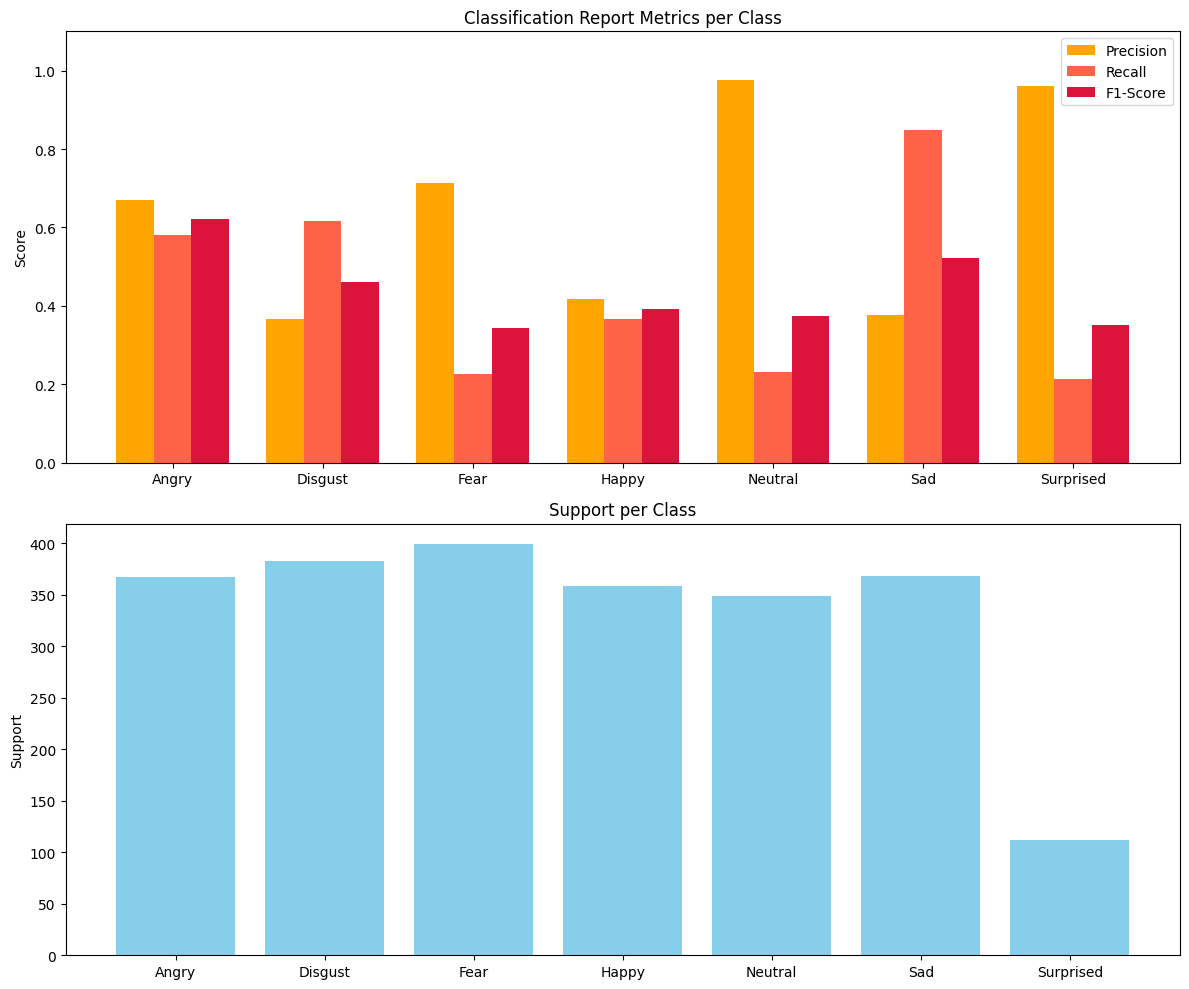

In [34]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict = {'Angry': report_dict['Angry'], 'Disgust': report_dict['Disgust'], 'Fear': report_dict['Fear'], 'Happy': report_dict['Happy'], 'Neutral': report_dict['Neutral'], 'Sad': report_dict['Sad'], 'Neutral': report_dict['Neutral'], 'Surprised': report_dict['Surprised']}
print(report_dict)

class_labels = list(report_dict.keys())

precision = [report_dict[label]['precision'] for label in class_labels]
recall = [report_dict[label]['recall'] for label in class_labels]
f1_score = [report_dict[label]['f1-score'] for label in class_labels]
support = [report_dict[label]['support'] for label in class_labels]

x = np.arange(len(class_labels))
width = 0.25

fig, axs = plt.subplots(2, 1, figsize=(12, 10))
axs[0].bar(x - width, precision, width, label='Precision', color='orange')
axs[0].bar(x, recall, width, label='Recall', color='tomato')
axs[0].bar(x + width, f1_score, width, label='F1-Score', color='crimson')

axs[0].set_ylabel('Score')
axs[0].set_title('Classification Report Metrics per Class')
axs[0].set_xticks(x)
axs[0].set_xticklabels(class_labels)
axs[0].legend()
axs[0].set_ylim(0, 1.1)

axs[1].bar(class_labels, support, color='skyblue')
axs[1].set_ylabel('Support')
axs[1].set_title('Support per Class')

plt.tight_layout()
plt.show()

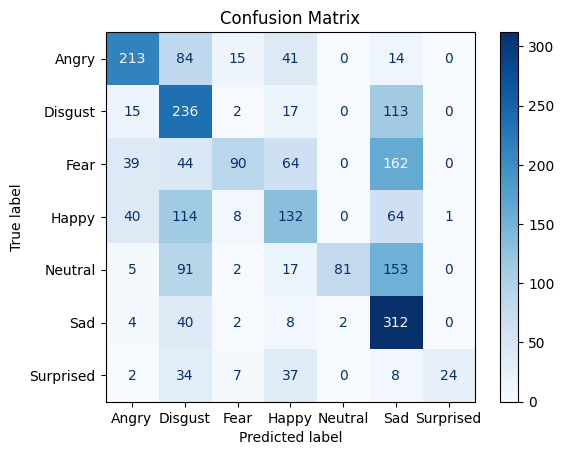

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
